In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip drive/MyDrive/Archive.zip -d Archive

Archive:  drive/MyDrive/Archive.zip
  inflating: Archive/2018.csv        
  inflating: Archive/2019.csv        
  inflating: Archive/2020.csv        
  inflating: Archive/2021.csv        
  inflating: Archive/2022.csv        
  inflating: Archive/2023.csv        


In [4]:


import os
import pandas as pd

from sentence_transformers import SentenceTransformer


PATH = "Archive"

tables = []
for i in os.listdir(PATH):

    tables.append(pd.read_csv(os.path.join(PATH,i)))

table = pd.concat(tables,ignore_index=True)

table = table.drop("eid",axis=1)



def get_paper_string(x):

    x_na = x.isna()
    EMPTY_ABSTRACT = x_na["abstracts"]
    EMPTY_DESCRIPTION = x_na["description"]

    if (EMPTY_ABSTRACT) and (EMPTY_DESCRIPTION):
        return "Researchers wrote a paper with an empty abstract and an empty description."
    elif (EMPTY_ABSTRACT):
        return "Researchers wrote a paper with an empty abstract With the following description: "+x["description"]
    elif (EMPTY_DESCRIPTION):
        return "Researchers wrote a paper with the following abstract: "+ x["abstracts"]+"\n with no additional description"

    else:
        return ("Researchers wrote a paper with the following abstract: "+ x["abstracts"]+"\n with the following description: "+x["description"]

    )

dataset = table.apply(get_paper_string,axis=1)


model = SentenceTransformer("all-MiniLM-L6-v2")

vectors = model.encode(dataset)

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42, n_iter=1000)

embeddings = tsne.fit_transform(vectors)

In [8]:
embeddings.shape

(20216, 2)

In [10]:
len(embeddings)

20216

(20216,)

In [15]:
import numpy as np

new_embeddings = np.concatenate([embeddings,np.arange(len(embeddings)).reshape(-1,1)],axis=1)

In [16]:
new_embeddings

array([[ 3.15546684e+01,  1.10883293e+02,  0.00000000e+00],
       [-2.26008773e-01,  5.93512802e+01,  1.00000000e+00],
       [-6.19085655e+01,  5.36482811e+01,  2.00000000e+00],
       ...,
       [ 6.31830750e+01,  1.75161419e+01,  2.02130000e+04],
       [ 6.36119232e+01,  5.04806137e+01,  2.02140000e+04],
       [-4.50552483e+01, -2.07884903e+01,  2.02150000e+04]])

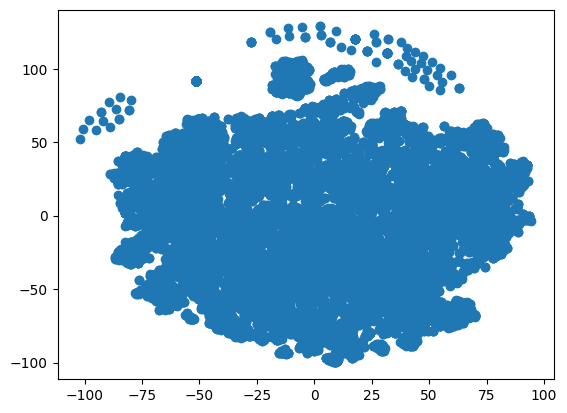

In [9]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1])
plt.show()

In [17]:
import plotly.express as px

fig = px.scatter(new_embeddings,x=0,y=1,hover_name=2)
fig.show()